10. Tempreture forecasting using RNN.

In [16]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [17]:
# Step 2: Load the dataset
# Replace 'path_to_your_dataset.csv' with your actual dataset path
data = pd.read_csv('data/historical_temperature_data/DailyDelhiClimateTrain.csv')
data['date'] = pd.to_datetime(data['date'])  # Assuming 'date' column exists
data.set_index('date', inplace=True)

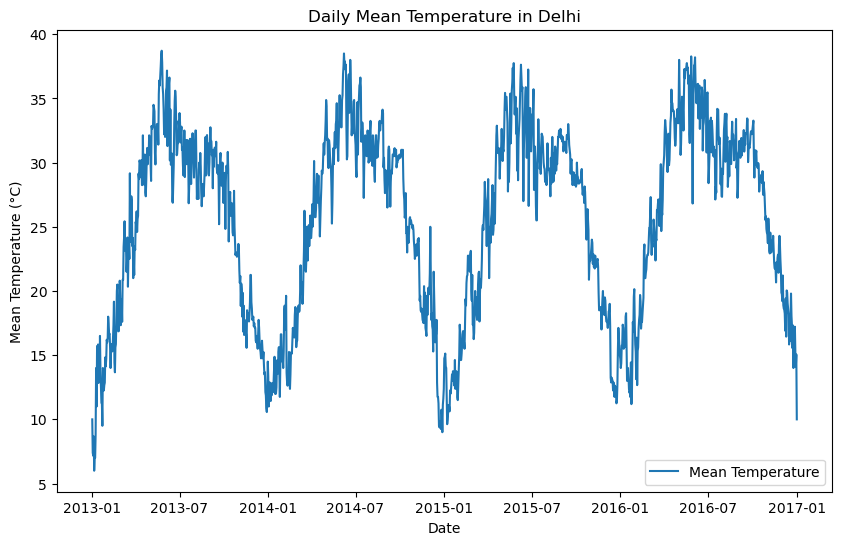

In [18]:
# Step 3: Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(data['meantemp'], label='Mean Temperature')  # Adjusted column name
plt.title('Daily Mean Temperature in Delhi')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()


In [19]:
# Step 5: Normalize the temperature data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['meantemp'].values.reshape(-1, 1))


In [20]:
# Step 6: Prepare the training and testing datasets
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define the time step
time_step = 30  # Use the past 30 days to predict the next temperature
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [21]:
# Step 7: Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [22]:
# Step 8: Build the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

C:\Users\ajays\anaconda3\envs\hakthon\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Step 9: Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
# Step 10: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1758 - val_loss: 0.0061
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0115 - val_loss: 0.0049
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0087 - val_loss: 0.0056
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0089 - val_loss: 0.0047
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0087 - val_loss: 0.0060
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0077 - val_loss: 0.0057
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0076 - val_loss: 0.0071
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0081 - val_loss: 0.0048
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0071 - val_loss: 0.0044
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0076 - val_loss: 0.0040
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0

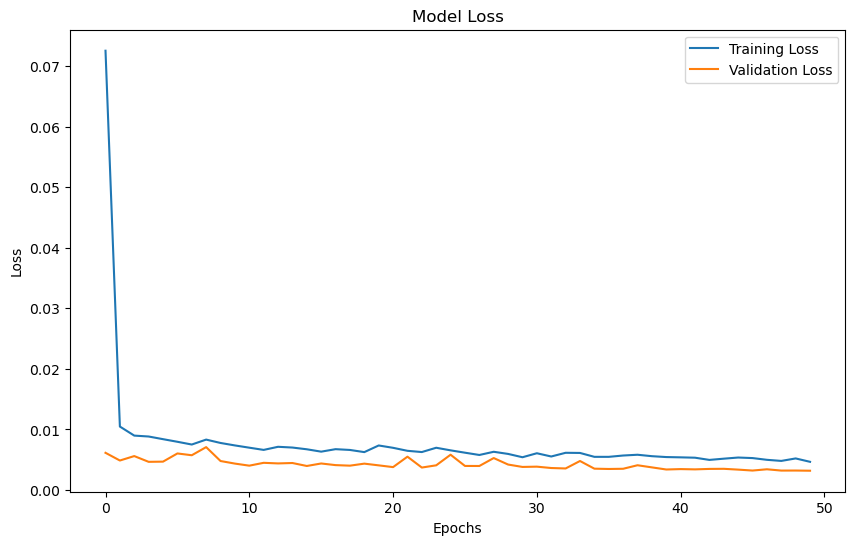

In [25]:
# Step 11: Visualize the training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Step 12: Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse transform to get actual values

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


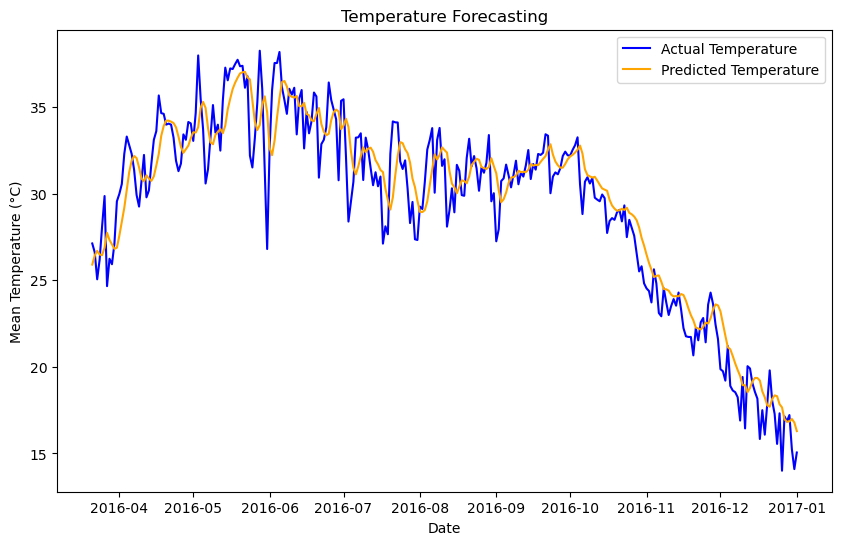

In [27]:
# Step 13: Visualize the predictions
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Temperature', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Temperature', color='orange')
plt.title('Temperature Forecasting')
plt.xlabel('Date')
plt.ylabel('Mean Temperature (°C)')
plt.legend()
plt.show()